In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
class Modelo():
    def __init__(self):
        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.modelos = {}

    def CarregarDataset(self, path):
        """
        Carrega o conjunto de dados a partir de um arquivo CSV.

        Parâmetros:
        - path (str): Caminho para o arquivo CSV contendo o dataset.
        """
        names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
        self.df = pd.read_csv(path, names=names)

    def TratamentoDeDados(self):
        """
        Realiza o pré-processamento dos dados carregados.
        """
        # Verificar valores ausentes e remover se necessário
        self.df.dropna(inplace=True)

        # Separar features (X) e target (y)
        X = self.df.drop("Species", axis=1)
        y = self.df["Species"]

        # Dividir em conjuntos de treino e teste
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalizar os dados
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)

    def Treinamento(self):
        """
        Treina dois modelos de machine learning: SVM e Regressão Logística.
        """
        # Modelo SVM
        svm_model = SVC(kernel='linear', random_state=42)
        svm_model.fit(self.X_train, self.y_train)
        self.modelos['SVM'] = svm_model

        # Modelo Regressão Logística
        lr_model = LogisticRegression(random_state=42)
        lr_model.fit(self.X_train, self.y_train)
        self.modelos['LogisticRegression'] = lr_model

    def Teste(self):
        """
        Avalia o desempenho dos modelos treinados nos dados de teste e plota as matrizes de confusão.
        """
        for nome, modelo in self.modelos.items():
            y_pred = modelo.predict(self.X_test)
            acc = accuracy_score(self.y_test, y_pred)
            print(f"\nModelo: {nome}")
            print(f"Acurácia: {acc:.2f}")
            print(classification_report(self.y_test, y_pred))
            
            # Plotar a matriz de confusão
            self.PlotarMatrizDeConfusao(self.y_test, y_pred, nome)

    def PlotarMatrizDeConfusao(self, y_true, y_pred, modelo_nome):
        """
        Plota a matriz de confusão usando seaborn com gradiente de cores verde.
        """
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=self.df["Species"].unique(),
                    yticklabels=self.df["Species"].unique())
        plt.title(f"Matriz de Confusão - {modelo_nome}")
        plt.xlabel("Classe Prevista")
        plt.ylabel("Classe Real")
        plt.show()

    def Train(self):
        """
        Função principal para executar o fluxo de treinamento e avaliação.
        """
        dataset_path = "iris.data"  # Ajuste o caminho conforme necessário
        self.CarregarDataset(dataset_path)
        self.TratamentoDeDados()
        self.Treinamento()
        self.Teste()




Modelo: SVM
Acurácia: 0.97
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



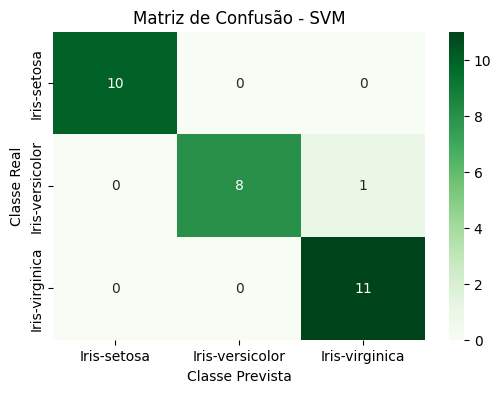


Modelo: LogisticRegression
Acurácia: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



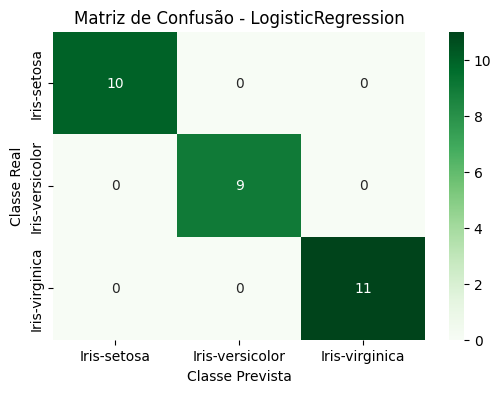

In [9]:
# Executar o fluxo completo
modelo = Modelo()
modelo.Train()
